In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

# Gradient Descent method implementation 

In [15]:
def gradient_descent(x,y,theta_0,theta_1,alpha,epochs):
    
    MSE = []
    MAE= []
    MAPE = []
    for i in range(epochs):
    
        h = theta_1*x + theta_0
        d_theta_0 = (-1/len(x))*sum(y - h)
        d_theta_1 = (-1/len(x))*sum((y - h)*x)

        theta_0 += -alpha*d_theta_0
        theta_1 += -alpha*d_theta_1
        
        MSE.append((1/len(x))*sum((y - h)**2))
        MAE.append((1/len(x))*sum(abs(y - h)))
        MAPE.append((100/len(x))*sum(abs((y - h)/y)))
        
    return theta_0, theta_1, MSE, MAE, MAPE

# Finding the best parameters $\theta_{1}$ and $\theta_{0}$ using Gradient Descent method

In [16]:
df = pd.read_csv('data.csv')

x = df.iloc[:, 0]
y = df.iloc[:, 1]

theta_1_0 = 10     
theta_0_0 = 10       
alpha = 0.0001   # alpha
epochs = 100     # The number of iterations  

theta_0, theta_1, MSE, MAE, MAPE = gradient_descent(x,y,theta_0_0,theta_1_0,alpha,epochs)

print("θ1 = ",theta_1 , "  θ0 = ",theta_0)

θ1 =  1.2889137694663224   θ0 =  9.829227849520889


# Using scipy.optimize

In [12]:
def func(x, a1, a0):
    return a1 * x + a0

p0=np.array([10.0,10.0])
popt, pcov = curve_fit(func, x, y, p0, method='lm')
perr = np.sqrt(np.diag(pcov))
print('θ1= ',popt[0])
print('θ0= ',popt[1])

θ1=  1.2873573726251593
θ0=  9.908606057513113


# Visualizing different loss functions

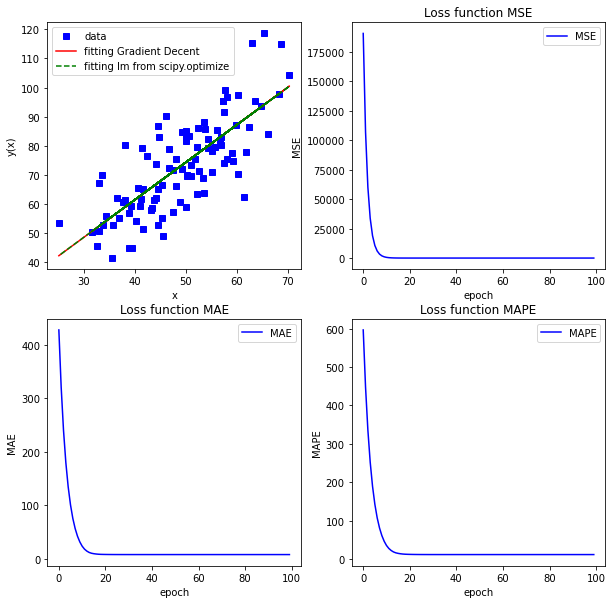

In [23]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(x,y,'sb', label='data')
ax[0,0].plot(x,func(x,theta_1,theta_0),'-r', label='fitting Gradient Decent')
ax[0,0].plot(x,func(x,popt[0],popt[1]),'--g', label='fitting lm from scipy.optimize')

ax[0,0].set_xlabel('x')
ax[0,0].set_ylabel('y(x)')
ax[0,0].legend()

epochs = np.arange(100)

ax[0,1].plot(epochs,MSE,'-b', label='MSE')
ax[0,1].set_xlabel('epoch')
ax[0,1].set_ylabel('MSE')
ax[0,1].set_title('Loss function MSE')
ax[0,1].legend()

ax[1,0].plot(epochs,MAE,'-b', label='MAE')
ax[1,0].set_xlabel('epoch')
ax[1,0].set_ylabel('MAE')
ax[1,0].set_title('Loss function MAE')
ax[1,0].legend()


ax[1,1].plot(epochs,MAPE,'-b', label='MAPE')
ax[1,1].set_xlabel('epoch')
ax[1,1].set_ylabel('MAPE')
ax[1,1].set_title('Loss function MAPE')
ax[1,1].legend()



# What about $\alpha$ parameter? 

θ1 =  1.288910336944935   θ0 =  9.829402912581577
θ1 =  15.822678693439126   θ0 =  10.114400846041175


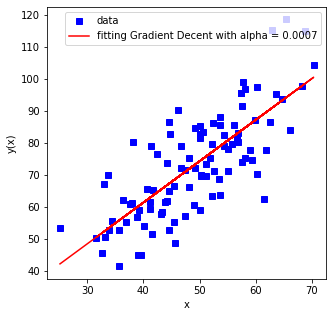

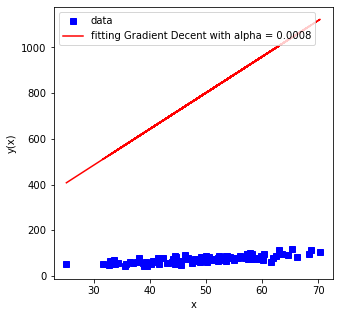

In [37]:
theta_1_0 = 10     
theta_0_0 = 10       
alpha = 0.0007   # changing alpha value
epochs = 100     # The number of iterations  

theta_0, theta_1, MSE, MAE, MAPE = gradient_descent(x,y,theta_0_0,theta_1_0,alpha,epochs)

print("θ1 = ",theta_1 , "  θ0 = ",theta_0)

fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(x,y,'sb', label='data')
ax.plot(x,func(x,theta_1,theta_0),'-r', label='fitting Gradient Decent with alpha = 0.0007')
ax.set_xlabel('x')
ax.set_ylabel('y(x)')
ax.legend()

theta_1_0 = 10     
theta_0_0 = 10       
alpha = 0.0008   # changing alpha value
epochs = 100     # The number of iterations  

theta_0, theta_1, MSE, MAE, MAPE = gradient_descent(x,y,theta_0_0,theta_1_0,alpha,epochs)

print("θ1 = ",theta_1 , "  θ0 = ",theta_0)

fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(x,y,'sb', label='data')
ax.plot(x,func(x,theta_1,theta_0),'-r', label='fitting Gradient Decent with alpha = 0.0008')
ax.set_xlabel('x')
ax.set_ylabel('y(x)')
ax.legend()

When $\alpha$ is large enough a minor change in its value can change the whole fit result. In other hand, the best results are obteined when $\alpha$ is small enough.   